In [1]:
#Q1
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

data = {
    "Age": [25, 30, np.nan, 28, 35, np.nan, 40],
    "Salary": [50000, 60000, 58000, np.nan, 72000, np.nan, 80000],
    "Height": [160, 170, 175, np.nan, 180, 165, 178],
    "Weight": [65, 70, 75, 80, 85, np.nan, 90],
    "City": ["Delhi", "Mumbai", "Chennai", "Delhi", "Mumbai", "Chennai", "Delhi"]
}
df = pd.DataFrame(data)
print("Original Dataset:\n", df)
#(a)
df_drop = df.dropna()
print("\nAfter Dropping Rows:\n", df_drop)
#(b)
df_mean = df.fillna(df.mean(numeric_only=True))
print("\nAfter Filling with Mean:\n", df_mean)

df_median = df.fillna(df.median(numeric_only=True))
print("\nAfter Filling with Median:\n", df_median)
#(c)
knn = KNNImputer(n_neighbors=2)
df_knn = df.copy()
df_knn.iloc[:, :-1] = knn.fit_transform(df_knn.iloc[:, :-1])
print("\nAfter KNN Imputer:\n", df_knn)


Original Dataset:
     Age   Salary  Height  Weight     City
0  25.0  50000.0   160.0    65.0    Delhi
1  30.0  60000.0   170.0    70.0   Mumbai
2   NaN  58000.0   175.0    75.0  Chennai
3  28.0      NaN     NaN    80.0    Delhi
4  35.0  72000.0   180.0    85.0   Mumbai
5   NaN      NaN   165.0     NaN  Chennai
6  40.0  80000.0   178.0    90.0    Delhi

After Dropping Rows:
     Age   Salary  Height  Weight    City
0  25.0  50000.0   160.0    65.0   Delhi
1  30.0  60000.0   170.0    70.0  Mumbai
4  35.0  72000.0   180.0    85.0  Mumbai
6  40.0  80000.0   178.0    90.0   Delhi

After Filling with Mean:
     Age   Salary      Height  Weight     City
0  25.0  50000.0  160.000000    65.0    Delhi
1  30.0  60000.0  170.000000    70.0   Mumbai
2  31.6  58000.0  175.000000    75.0  Chennai
3  28.0  64000.0  171.333333    80.0    Delhi
4  35.0  72000.0  180.000000    85.0   Mumbai
5  31.6  64000.0  165.000000    77.5  Chennai
6  40.0  80000.0  178.000000    90.0    Delhi

After Filling with Me

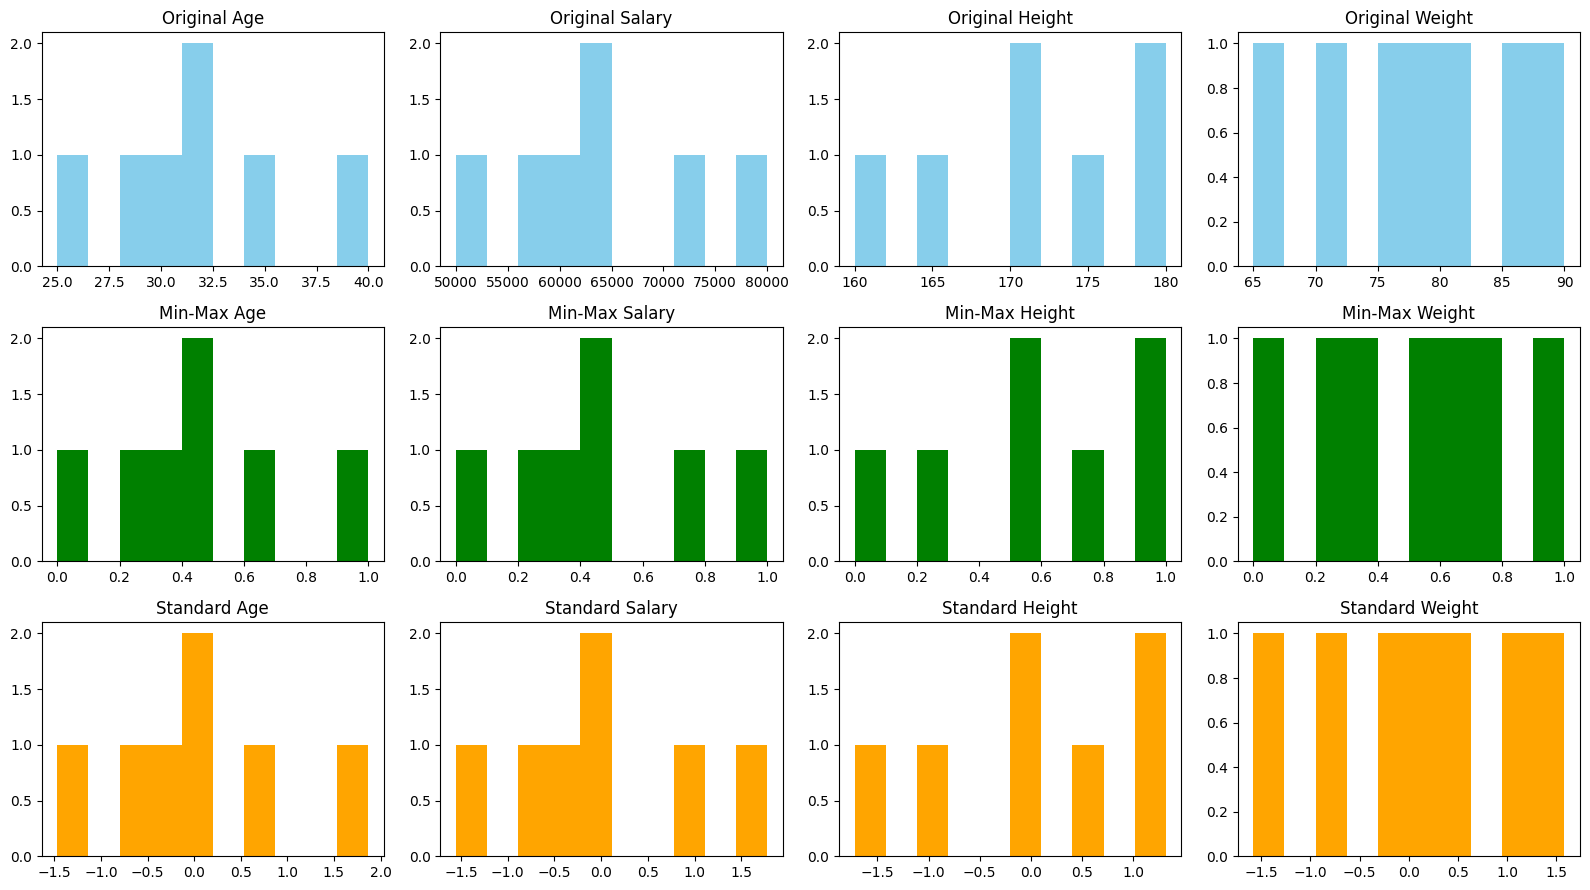

In [2]:
#Q2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_num = df_mean[["Age", "Salary", "Height", "Weight"]]

scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_num), columns=df_num.columns)
df_standard = pd.DataFrame(scaler_standard.fit_transform(df_num), columns=df_num.columns)

fig, axes = plt.subplots(3, 4, figsize=(16, 9))
for i, col in enumerate(df_num.columns):
    axes[0, i].hist(df_num[col], bins=10, color="skyblue")
    axes[0, i].set_title(f"Original {col}")

    axes[1, i].hist(df_minmax[col], bins=10, color="green")
    axes[1, i].set_title(f"Min-Max {col}")

    axes[2, i].hist(df_standard[col], bins=10, color="orange")
    axes[2, i].set_title(f"Standard {col}")

plt.tight_layout()
plt.show()


In [3]:
#Q3
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding
le = LabelEncoder()
df_label = df.copy()
df_label["City_Label"] = le.fit_transform(df_label["City"])
print("\nLabel Encoded:\n", df_label[["City", "City_Label"]])

# One-Hot Encoding
ohe = OneHotEncoder(sparse_output=False)
city_ohe = ohe.fit_transform(df[["City"]])
df_ohe = pd.DataFrame(city_ohe, columns=ohe.get_feature_names_out(["City"]))
print("\nOne-Hot Encoded:\n", pd.concat([df, df_ohe], axis=1))



Label Encoded:
       City  City_Label
0    Delhi           1
1   Mumbai           2
2  Chennai           0
3    Delhi           1
4   Mumbai           2
5  Chennai           0
6    Delhi           1

One-Hot Encoded:
     Age   Salary  Height  Weight     City  City_Chennai  City_Delhi  \
0  25.0  50000.0   160.0    65.0    Delhi           0.0         1.0   
1  30.0  60000.0   170.0    70.0   Mumbai           0.0         0.0   
2   NaN  58000.0   175.0    75.0  Chennai           1.0         0.0   
3  28.0      NaN     NaN    80.0    Delhi           0.0         1.0   
4  35.0  72000.0   180.0    85.0   Mumbai           0.0         0.0   
5   NaN      NaN   165.0     NaN  Chennai           1.0         0.0   
6  40.0  80000.0   178.0    90.0    Delhi           0.0         1.0   

   City_Mumbai  
0          0.0  
1          1.0  
2          0.0  
3          0.0  
4          1.0  
5          0.0  
6          0.0  


In [4]:
#Q4
def manual_minmax(series):
    return (series - series.min()) / (series.max() - series.min())

print("\nManual Normalization vs MinMaxScaler on Age:")
print("Manual:", manual_minmax(df_mean["Age"]).tolist())
print("Sklearn:", df_minmax["Age"].tolist())



Manual Normalization vs MinMaxScaler on Age:
Manual: [0.0, 0.3333333333333333, 0.4400000000000001, 0.2, 0.6666666666666666, 0.4400000000000001, 1.0]
Sklearn: [0.0, 0.33333333333333326, 0.44000000000000017, 0.19999999999999996, 0.6666666666666667, 0.44000000000000017, 0.9999999999999998]


In [5]:
#Q5
df_domain = df.copy()
df_domain["Education"] = ["UG", "PG", "UG", "UG", "PhD", "PG", "PhD"]

# Fill salary with group-wise mean
df_domain["Salary"] = df_domain.groupby("Education")["Salary"].transform(lambda x: x.fillna(x.mean()))
print("\nSalary Imputation with Domain Knowledge:\n", df_domain)



Salary Imputation with Domain Knowledge:
     Age   Salary  Height  Weight     City Education
0  25.0  50000.0   160.0    65.0    Delhi        UG
1  30.0  60000.0   170.0    70.0   Mumbai        PG
2   NaN  58000.0   175.0    75.0  Chennai        UG
3  28.0  54000.0     NaN    80.0    Delhi        UG
4  35.0  72000.0   180.0    85.0   Mumbai       PhD
5   NaN  60000.0   165.0     NaN  Chennai        PG
6  40.0  80000.0   178.0    90.0    Delhi       PhD


In [6]:
#Q6
from scipy import stats

feature = df_mean["Salary"]

# Z-score Method
z_scores = np.abs(stats.zscore(feature))
outliers_z = df_mean[z_scores > 3]
print("\nOutliers using Z-score:\n", outliers_z)

# IQR Method
Q1, Q3 = feature.quantile([0.25, 0.75])
IQR = Q3 - Q1
outliers_iqr = df_mean[(feature < Q1 - 1.5*IQR) | (feature > Q3 + 1.5*IQR)]
print("\nOutliers using IQR:\n", outliers_iqr)



Outliers using Z-score:
 Empty DataFrame
Columns: [Age, Salary, Height, Weight, City]
Index: []

Outliers using IQR:
 Empty DataFrame
Columns: [Age, Salary, Height, Weight, City]
Index: []


In [7]:
#Q7
from sklearn.preprocessing import StandardScaler

df_feat = df_mean.copy()
df_feat["BMI"] = df_feat["Weight"] / (df_feat["Height"]/100)**2

# Normalize & Scale BMI
df_feat["BMI_Normalized"] = manual_minmax(df_feat["BMI"])
df_feat["BMI_Standard"] = StandardScaler().fit_transform(df_feat[["BMI"]])

print("\nFeature Engineering (BMI):\n", df_feat[["Height", "Weight", "BMI", "BMI_Normalized", "BMI_Standard"]])



Feature Engineering (BMI):
        Height  Weight        BMI  BMI_Normalized  BMI_Standard
0  160.000000    65.0  25.390625        0.275421     -0.591994
1  170.000000    70.0  24.221453        0.000000     -1.312274
2  175.000000    75.0  24.489796        0.063213     -1.146959
3  171.333333    80.0  27.252494        0.714021      0.555029
4  180.000000    85.0  26.234568        0.474229     -0.072074
5  165.000000    77.5  28.466483        1.000000      1.302919
6  178.000000    90.0  28.405504        0.985635      1.265352
